ΧΑΤΖΗΡΟΥΦΑΣ ΚΩΝΣΤΑΝΤΙΝΟΣ 


**ΕΙΣΑΓΩΓΗ**

**Το 'Weather Image Recognition' είναι ένα σύνολο δεδομένων που περιέχει 6862 εικόνες καιρού. Οι εικόνες κατηγοριοποιούνται σε 11 κατηγορίες (dew, fog/smog, frost, glaze, hail, lightning , rain, rainbow, rime, sandstorm and snow) με κάθε κατηγορία να περιέχει τις αντίστοιχες εικόνες. Ο στόχος αυτού του σύνολου δεδομένων είναι να αναπτύξει ένα μοντέλο ταξινόμησης που μπορεί να ταξινομήσει με ακρίβεια τις εικόνες καιρού στον αντίστοιχο τους τύπο καιρού. Με την ανάλυση των εικόνων στόχος είναι να γίνει η διάκριση τους στις σωστές κατηγορίες που ανήκουν.**

**ΦΟΡΤΩΣΗ ΤΩΝ ΑΠΑΡΑΙΤΗΤΩΝ ΒΙΒΛΙΟΘΗΚΩΝ**

Στο παρακάτω κελί γίνεται η εισαγωγή βιβλιοθηκών και ενοτήτων που σχετίζονται με μηχανική και βαθιά μάθηση.

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

import numpy as np
import keras
import sklearn.metrics
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pathlib
import seaborn as sns

2024-06-15 13:50:59.037342: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-15 13:50:59.201482: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-15 13:51:00.002095: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-15 13:51:02.342533: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


**ΦΟΡΤΩΣΗ ΣΥΝΟΛΟΥ ΔΕΔΟΜΕΝΩΝ ( DATA LOADING )**

In [2]:
#path of dataset
folder1_path = '/home/chatziroufas/Desktop/VathiaMathish/archive/dataset'

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2) #performs the rescaling during the data generation process, 
image_width = 64 #set the image size
image_height = 64
labels = list()  #Initializing an empty list

# Load the dataset 
class_names = sorted(os.listdir(folder1_path))  #get the list of all files in the specified directory
num_classes = len(class_names)

print("Class Names:", class_names)
print("Number of Classes:", num_classes)
print('')

lightImages = [] #Initializing empty list
lightLabels = []

for class_name in class_names:
    folder_path = os.path.join(folder1_path, class_name) #join the directory path and the file name together to create the full path of each file
    num_images1 = len(os.listdir(folder_path))
    print(f"Folder: {class_name} - Number of Images: {num_images1}")
    print('-------------------------------------------------------')

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        pil_img = image.load_img(path=img_path, color_mode="rgb", target_size=(image_width, image_height))
        lightImages.append(image.img_to_array(pil_img)) #covert and appent each image to NumPy array
        lightLabels.append(class_name)

lightImages = np.array(lightImages) #covert to NumPy arrays
lightLabels = np.array(lightLabels)


Class Names: ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
Number of Classes: 11

Folder: dew - Number of Images: 698
-------------------------------------------------------
Folder: fogsmog - Number of Images: 851
-------------------------------------------------------
Folder: frost - Number of Images: 475
-------------------------------------------------------
Folder: glaze - Number of Images: 639
-------------------------------------------------------
Folder: hail - Number of Images: 591
-------------------------------------------------------
Folder: lightning - Number of Images: 377
-------------------------------------------------------
Folder: rain - Number of Images: 526
-------------------------------------------------------
Folder: rainbow - Number of Images: 232
-------------------------------------------------------
Folder: rime - Number of Images: 1160
-------------------------------------------------------
Folder: 


Το αποτέλεσμα δείχνει τις εικόνες που περιέχονται σε κάθε φάκελο καθώς και το πόσες είναι. Επιπλέον βλέπουμε τις κατηγορίες που έχουμε.

Έπειτα, συνενώνω τις εικόνες σε ένα πίνακα .


In [3]:
#Combine 
images = ((lightImages)) #along the first axis
labels = ((lightLabels))

print(images.shape)
print(labels.shape)

(6862, 64, 64, 3)
(6862,)


    Στο output, παρατηρώ ο πίνακας images είναι τεσσάρων διαστάσεων: Το 6862 αντιπροσωπεύει το σύνολο των εικόνων, τα (64,64) το πλάτος και το μήκος των εικόνων, και το 3 το πλήθος των καναλιών χρώματος (RGB).
    O πίνακας images είναι μονοδιάστατος και το 6862 αντιστοιχεί στο πλήθος των labels για όλες τις εικόνες συνολικά. Κάθε ετικέτα αντιστοιχεί σε μία εικόνα.

Στο κελί που ακολουθεί πραγματοποιείται η εύρεση των μοναδικών ετικετών που αντιστοιχούν στις κλάσεις.

In [4]:
classes = np.unique(labels) 
classes

array(['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain',
       'rainbow', 'rime', 'sandstorm', 'snow'], dtype='<U9')

Δημιουργείται ένα λεξικό label_dict όπου οι ετικέτες από το πίνακα classes αντιστοιχούνται σε μία ακέραια τιμή.

In [5]:
# label dictionary
label_dict = {label: i for i, label in enumerate(classes)}
label_dict

{'dew': 0,
 'fogsmog': 1,
 'frost': 2,
 'glaze': 3,
 'hail': 4,
 'lightning': 5,
 'rain': 6,
 'rainbow': 7,
 'rime': 8,
 'sandstorm': 9,
 'snow': 10}

Το ακόλουθο κελί πραγματοποιεί αντιστοίχιση των ονομάτων των κλάσεων σε ακέραιους αριθμούς και στη  πραγματοπποιεί one-hot encoding σε όλους τους ακεραίους. Αυτό επιτυγχάνεται με τη χρήση της συνάρτησης to_categorical που μετατρέπει τις ακέραιες ετικέτες σε one-hot κωδικοποιημένα διανύσματα.

In [6]:
# Map the class names to integers using the label_dict dictionary
labels_int = np.array([label_dict[label] for label in labels.flatten()])

# Convert the integer labels to one-hot encoded vectors
labels_categorical = to_categorical(labels_int, num_classes=len(label_dict)).astype(int)

Εδώ διαχωρίζονται τα δεδομένα σε train set και test set, τόσο για τις εικόνες όσο και για τις ετικέτες. Η παράμετρος test_size έχει οριστεί σε 0,2, δείχνοντας ότι το 20% των δεδομένων θα χρησιμοποιηθεί για δοκιμές (testing), ενώ το υπόλοιπο 80% θα χρησιμοποιηθεί για εκπαίδευση του μοντέλου (training).

In [7]:
# Split data( train and test sets )
train_images, test_images, train_labels, test_labels = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

Εμφάνιση του συνόλου των κλάσεων που χρησιμοποιήθηκαν στο training dataset και στο test dataset.

In [8]:
# Compute the number of classes
num_train_classes = len(np.unique(labels))
num_test_classes = len(np.unique(labels))

print("Number of Classes in Training Dataset:", num_train_classes)
print("Number of Classes in Validation Dataset:", num_test_classes)

Number of Classes in Training Dataset: 11
Number of Classes in Validation Dataset: 11


Αυτό το βήμα (κανονικοποίησης) κλιμακώνει τις τιμές των εικονοστοιχείων από το εύρος [0, 255] σε [0, 1]

In [9]:
#Normalization
train_images = train_images / 255
test_images = test_images / 255

Αυτές οι γραμμές υπολογίζουν και εκτυπώνουν τις ελάχιστες και μέγιστες τιμές pixel του συνόλου εκπαίδευσης και δοκιμής (σκοπός είναι να ελέγχθει αν η κανονικοποίηση έγινε με σωστό τρόπο)

In [10]:
print("Minimum Pixel Value (Training Set):", np.min(train_images))
print("Maximum Pixel Value (Training Set):", np.max(train_images))
print('')

print("Minimum Pixel Value (Test Set):", np.min(test_images))
print("Maximum Pixel Value (Test Set):", np.max(test_images))

Minimum Pixel Value (Training Set): 0.0
Maximum Pixel Value (Training Set): 1.0

Minimum Pixel Value (Test Set): 0.0
Maximum Pixel Value (Test Set): 1.0


Γίνεται οπτικοποίηση κάποιον εικόνων του συνόλου δεδομένων εκπαίδευσης.

Random Index Samples: [ 860 5390 5226 5191 3772 3092  466 5334 4426]


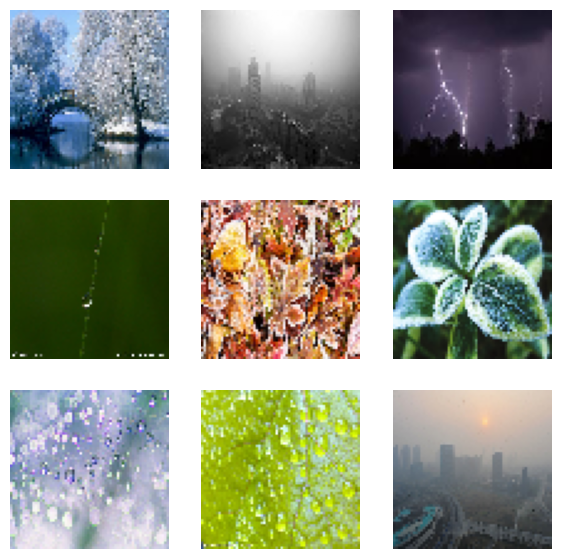

In [11]:
#Display a set of images from the training dataset
np.random.seed(42) #for the same random samples

# Obtain a number of random samples from the training dataset
# by randomly sampling the indices of these images

number_of_samples = 9 #define the number of samples
random_samples = np.random.randint(0, # the closed lower boundary of random integers
                                   train_images.shape[0], # the open upper boundary of random integers
                                   size=(number_of_samples,) #number of samples
                                  )
print("Random Index Samples:", random_samples)

#These lines extract the randomly selected images and their labels 
#based on the randomly generated indices.
random_train_images = train_images[random_samples]
random_label_images = train_labels[random_samples]

# create a subplot grid
fig, ax = plt.subplots(nrows = 3, ncols=3, figsize=(7, 7))
cntr=0
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(random_train_images[cntr])  #displayed image RGB
        ax[i,j].axis("off")
        cntr += 1
plt.show()


**ΔΗΜΙΟΥΡΓΙΑ ΤΟΥ ΜΟΝΤΕΛΟΥ**

Αυτό το τμήμα κώδικα δημιουργεί ένα μοντέλο συνελικτικού νευρωνικού δικτύου (CNN) χρησιμοποιώντας τη βιβλιοθήκη Keras.Η επιθυμητή αρχιτεκτονική, θα αποτελείται από μια στοίβα επιπέδων τα οποία θα συνδέονται ακολουθιακά, και έτσι η υλοποίηση της μπορεί να πραγματοποιηθεί μέσω της κατασκευής ενός Ακολουθιακού Μοντέλου (Sequential Model). Επίσης, χρησιμοποιείται η μέθοδος summary του μοντέλου, που δημιουργήθηκε για να απεικονιστεί σχηματικά η αρχιτεκτονική του κατασκευασμένου δικτύου. Αναλυτικότερα:

    Input Shape: Δέχεται εικόνες εισόδου μεγέθους 64x64 pixel με 3 έγχρωμα κανάλια (RGB)
    Convolution Layers:
        Το πρώτο επίπεδο Conv2D έχει 32 φίλτρα (δηλαδή θα εξαχθεί χάρτης εξόδου 32 χαρακτηριστικών), μέγεθος πυρήνα/παράθυρο ολίσθησης (3,3), εφαρμόζει "ίδιο" padding και χρησιμοποιεί τη συνάρτηση ενεργοποίησης ReLU.
        Το δεύτερο επίπεδο Conv2D έχει 64 φίλτρα, μέγεθος πυρήνα (3,3) και εφαρμόζει "ίδιο" padding. Χρησιμοποιεί επίσης τη συνάρτηση ενεργοποίησης ReLU.
        Το τρίτο επίπεδο Conv2D έχει 128 φίλτρα, μέγεθος πυρήνα (3,3) και εφαρμόζει "ίδιο" padding. Χρησιμοποιεί τη συνάρτηση ενεργοποίησης ReLU.
    Max Pooling Layers: Μετά από κάθε επίπεδο Conv2D, εφαρμόζεται ένα στρώμα MaxPooling2D (3 συνολικά) με pool_size (2,2). Έτσι, επιτυγχάνεται η υποδειγματοληψία, μειώνει την διάσταση των χωρικών διαστάσεων λαμβάνοντας την μέγιστη τιμή σε κάθε μπλοκ 2x2 του χάρτη χαρακτηριστικών εισόδου.Δύο ακόμη επίπεδα Conv2D και MaxPooling2D προστίθενται με αυξανόμενο αριθμό φίλτρων.
    Dropout Layers: Δύο στρώματα Dropout προστίθενται, ένα μετά το τρίτο στρώμα MaxPooling2D και ένα μετά το επίπεδο Flatten, αντίστοιχα. Το dropout rate=0,5, πράγμα που σημαίνει ότι κατά τη διάρκεια της εκπαίδευσης, το 50% των μονάδων στα αντίστοιχα επίπεδα ορίζεται τυχαία στο 0 σε κάθε ενημέρωση για να αποφευχθεί το overfitting.
    Flatten Layer: Μετατρέπει την έξοδο του προηγούμενου επιπέδου/στρώματος σε διάνυσμα. Μετατρέπει χάρτες χαρακτηριστικών 8x8x128 σε επίπεδο διάνυσμα μήκους 8192.
    Dense Layers:
        Το πρώτο Dense layer έχει 256 νευρώνες και χρησιμοποιεί τη συνάρτηση ενεργοποίησης ReLU. Λειτουργεί ως μετασχηματισμός των χαρακτηριστικών εισόδου σε έναν χώρο μειωμένων διαστάσεων ως ενδιάμεση αναπαράσταση και καταγράφει χαρακτηριστικά υψηλότερου επιπέδου.
        Το δεύτερο Dense layer έχει 11, που αντιστοιχούν στις 11 κλάσεις ταξινόμησης. Χρησιμοποιεί τη συνάρτηση ενεργοποίησης softmax για να παράγει την τελική κατανομή πιθανοτήτων στις 11 κλάσεις.



In [12]:

# Κατασκευή Ακολουθιακού Μοντέλου
cnn_model = keras.models.Sequential([keras.layers.Conv2D(filters=32, # πλήθος συνελικτικών φίλτρων
                                                        kernel_size=(3,3), # μέγεθος συνελικτικών φίλτρων
                                                        padding="same", # είδος padding -  same -> διαστάσεις εικόνων εξόδου = διαστάσεις εικόνων εισόδου
                                                        activation="relu", #define activation function
                                                        input_shape=(64,64,3)), #define input shape
                                     keras.layers.MaxPooling2D(pool_size=(2,2) #  Εφάρμοσε Max-Pooling με υποδιπλασιασμό κάθε διάστασης
                                                              ),
                                     keras.layers.Conv2D(filters=64,
                                                        kernel_size=(3,3),
                                                        padding="same",
                                                        activation="relu"),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=128,
                                                        kernel_size=(3,3),
                                                        padding="same",
                                                        activation="relu"),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Dropout(rate=0.5),
                                     keras.layers.Flatten(), # Κάνε την έξοδο του προηγούμενου επιπέδου διάνυσμα
                                     keras.layers.Dropout(rate=0.5), #overfitting
                                     keras.layers.Dense(units=256, 
                                                        activation="relu"
                                                       ),
                                     # επίπεδο εξόδου
                                     keras.layers.Dense(units=11, # 11 νευρώνες επειδή έχω 11 κλάσεις
                                                        activation="softmax" # Συνάρτηση ενεργοποίησης για Ταξινόμηση πολλών κλάσεων
                                                       )
                                    ]
                                   ) 
# εισάγω stopping για το  overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

cnn_model.summary()

/home/chatziroufas/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,193,483 (8.37 MB)

 Trainable params: 2,193,483 (8.37 MB)

 Non-trainable params: 0 (0.00 B)

Στην συνέχεια, προστίθενται στο μοντέλο, οι πληροφορίες αναφορικά με τον αλγόριθμο προσαρμογής (fitting algorithm). Συγκεκριμένα, θα ελαχιστοποιηθεί η συνάρτηση σφάλματος Cross-Entropy (Cross-Entropy Loss Function), ενώ ο Βελτιστοποιητής (Optimizer), που θα χρησιμοποιηθεί είναι ο "adam". Παράλληλα, κατά την διάρκεια της εκπαίδευσης και της επαλήθευσης θα υπολογίζεται και η μετρική της Ακρίβειας (Accuracy).

In [13]:
# Compile the model
#cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Στο σημείο αυτό, είναι εφικτή η έναρξη της εκπαίδευσης του Συνελικτικού Νευρωνικού Δίκτου, που κατασκευάστηκε. Η διαδικασία αυτή, πραγματοποιείται μέσω της μεθόδου fit, που διαθέτει το μοντέλο που δημιουργήθηκε. Ειδικότερα, στις δύο πρώτες παραμέτρους, θα τοποθετηθούν τα δεδομένα εκπαίδευσης (train images, train labels). Επίσης, ορίστηκε το μέγεθος της ομάδας παρατηρήσεων (batch size = 32) ανα βήμα της Στοχαστικής Κατάβασης Παραγώγου και το πλήθος των εποχών (epoch) = 10: Αυτό καθορίζει πόσες φορές θα επαναληφθεί το μοντέλο σε ολόκληρο το σύνολο δεδομένων εκπαίδευσης. Ακόμα, παρέχεται σύνολο δεδομένων επαλήθευσης μέσω της παραμέτρου validation_data που περιέχει το test_images: είναι οι εικόνες εισόδου για επικύρωση και το test_labels: είναι οι αντίστοιχες ετικέτες. Το μοντέλο θα αξιολογήσει την απόδοσή του στα δεδομένα επικύρωσης μετά από κάθε εποχή.

Κάνω complile το μοντέλο μου στο ίδιο κελί που κάνω fit το μοντέλο μου . Αυτό γίνεται για να περιορίσω να έχει γίνει ήδη train το μοντέλο πάνω απο μία φορά όταν θα ανοίγω τον αρχείο μου(jupyter).

In [14]:
cnn_model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics= ['accuracy'])
# Train the model
history = cnn_model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels),batch_size=32)

Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.3931 - loss: 1.7469 - val_accuracy: 0.6249 - val_loss: 1.0965
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.6282 - loss: 1.0714 - val_accuracy: 0.6817 - val_loss: 0.9945
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.6648 - loss: 0.9659 - val_accuracy: 0.6963 - val_loss: 0.9399
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.6770 - loss: 0.9353 - val_accuracy: 0.6897 - val_loss: 0.8914
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.7164 - loss: 0.8195 - val_accuracy: 0.7225 - val_loss: 0.8284
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.7220 - loss: 0.7995 - val_accuracy: 0.7196 - val_loss: 0.8395
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.7438 - loss: 0.7353 - val_accuracy: 0.7407 - val_loss: 0.7711
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.7508 - loss: 0.7137

Η εκπαιδευτική διαδικασία αποτελείται από 10 epoch, με κάθε epoch να επαναλαμβάνεται πάνω από το dataset σε τμήματα. Για κάθε epoch, εμφανίζονται η ακρίβεια εκπαίδευσης, η απώλεια εκπαίδευσης, η ακρίβεια επικύρωσης, η απώλεια επικύρωσης και ο ρυθμός εκμάθησης. Στο τέλος κάθε εποχής, αξιολογείται η απόδοση του μοντέλου στο σύνολο επικύρωσης και εάν η απώλεια επικύρωσης βελτιωθεί σε σύγκριση με την προηγούμενη καλύτερη απώλεια. Η διαδικασία εκπαίδευσης χρησιμοποιεί ένα batch_size = 32, υποδεικνύοντας ότι το σύνολο δεδομένων χωρίζεται σε τμήματα των 32 δειγμάτων για κάθε βήμα εκπαίδευσης. Η διαδικασία εκπαίδευσης περιλαμβάνει βήματα όπως ο υπολογισμός της απώλειας, ο υπολογισμός των κλίσεων και η ενημέρωση των βαρών του μοντέλου χρησιμοποιώντας το βελτιστοποιητή Adam. Η μέτρηση ακρίβειας χρησιμοποιείται για τη μέτρηση της απόδοσης του μοντέλου κατά την εκπαίδευση και την επικύρωση.

Το ακόλουθο τμήμα κώδικα χρησιμοποιείται για τον υπολογισμό και την εκτύπωση της ακρίβειας του μοντέλου νευρωνικού δικτύου (cnn_model) στα δεδομένα δοκιμής (test data).

In [15]:

# make the prediction
predictions_nn_probs = cnn_model.predict(test_images)

#assigned each image to the class with the highest probability
predictions_nn = np.argmax(predictions_nn_probs, axis=1)

#Calculate the accuracy 
test_labels_multiclass = np.argmax(test_labels, axis=1)
test_accuracy_nn = sklearn.metrics.accuracy_score(test_labels_multiclass, predictions_nn)

print("The Accuracy of the Neural Network on the Test Data is", test_accuracy_nn)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
The Accuracy of the Neural Network on the Test Data is 0.7479970866715222


Οπτικοποιώντας τις καμπύλες ακρίβειας, παρατηρoύμε πώς η ακρίβεια του μοντέλου αλλάζει κατά τη διάρκεια των εποχών εκπαίδευσης τόσο για τα σύνολα δεδομένων εκπαίδευση (train set) όσο και για την επικύρωση (validation). Στο ακόλουθο τμήμα κώδικα δημιουργείται ένα figure με δύο subplots δίπλα-δίπλα. Το αριστερό subplot δείχνει τις τιμές απώλειας τόσο για τα σετ εκπαίδευσης όσο και για τα σύνολα επικύρωσης, ενώ το δεξί υπογραφικό εμφανίζει τις τιμές ακρίβειας.

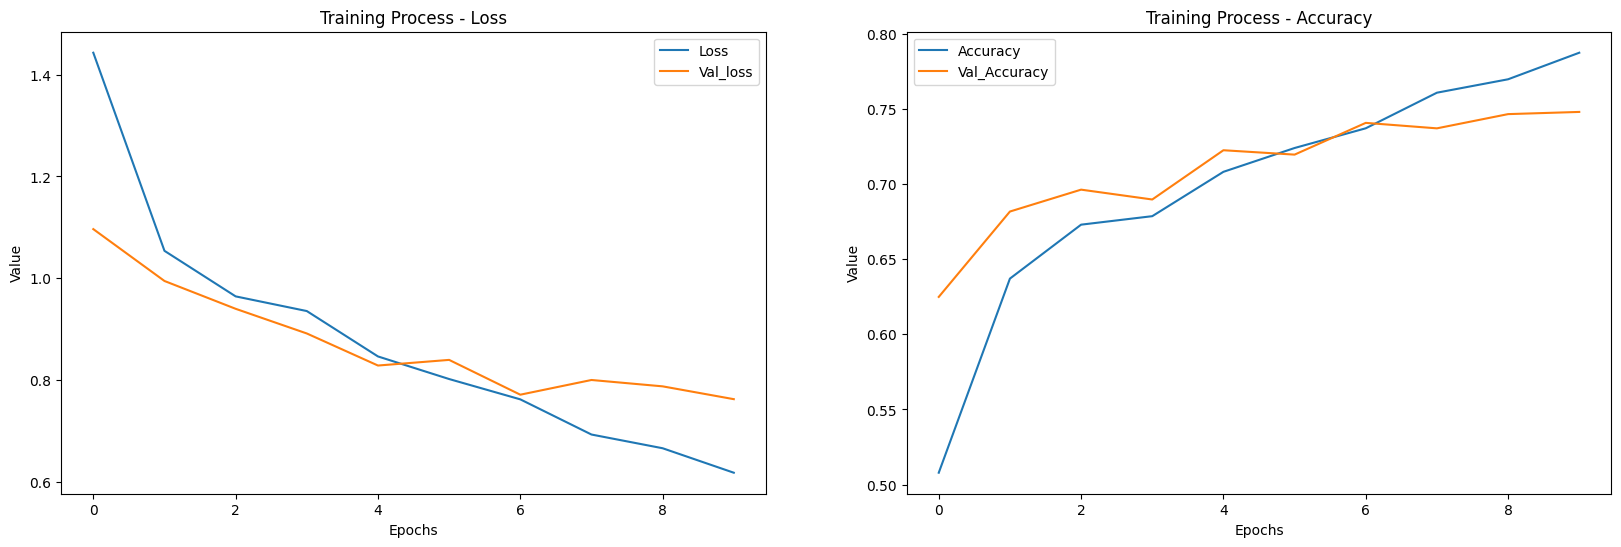

In [16]:
#Create a graph that will have 2 subgraphs next to each other
fig, axis = plt.subplots(nrows=1,ncols=2, figsize=(20,6))

#Creating the first chart (left)
axis[0].plot(history.epoch, history.history['loss']) #create Cross Entropy plot of training
axis[0].plot(history.epoch, history.history['val_loss']) #create Cross Entropy plot of validation
axis[0].set_xlabel("Epochs") #horizontal axis title definition 
axis[0].set_ylabel("Value") #vertical axis title definition
axis[0].legend(["Loss", "Val_loss"]) 
axis[0].set_title("Training Process - Loss") #chart title definition

#Creating the second graph (right) - Same process but for Accuracy
axis[1].plot(history.epoch, history.history['accuracy'])
axis[1].plot(history.epoch, history.history['val_accuracy'])
axis[1].set_xlabel("Epochs") 
axis[1].set_ylabel("Value") 
axis[1].legend(["Accuracy", "Val_Accuracy"])
axis[1].set_title("Training Process - Accuracy")
plt.show()

**Αριστερό Γράφημα**: το γράφημα δείχνει την πρόοδο του training model αφού δείχνει πως αλλάζουν οι τιμές της απώλειας κατα την πορεία του training.

- Το training loss ( blue ) μειώνεται όσο αυξάνεται ο αριθμός των epoch. Αυτό σημαίνει οτι το μοντέλο μαθαίνει και βελτιώνεται η αποδοσή του στα δεδομένα εκπαίδευσης.
- Το val loss αρχικά μειώνεται αλλά εν τέλη καταλήγει σε ένα σταθερό επίπεδο μετά απο ορισμένα epoch. Αυτό δείχνει οτι το μοντέλο έχει μια καλή γενίκευση σε μη ορατά δεδομένα . Η απώλεια επικύρωσης είναι ελάχιστα χαμηλότερη απο αυτή της εκπαίδευσης δείχνει οτι το μοντέλο αποδίδει καλά σε νέα παραδείγματα.
- Η απώλεια επικύρωσης και η απώλεια εκπαίδευσης έχουν πτωτική πορεία γεγονός που υποδυκνείει οτι το μοντέλο μαθαίνει καλά.

**Δεξίο Γράφημα**: το γράφημα δείχνει τις αλλαγές τις ακρίβειας κατά την διάρκεια των epoch για το σύνολο δεδομένων και της επικύρωσης. Πιο συγκεκριμένα:

- Στο epoch 1 η ακρίβεια ξεκινά περίπου στο 0.64 γεγονός που δείχνει οτι ταξινομήθηκε σωστά το 64% των δειγμάτων.
- Η ακρίβεια επικύρωσης στο epoch 1 κυμαίνεται περίπου στο 0.67 που σημαίνει οτι το μοντέλο πέτυχε ακρίβεια στο 67% στο σύνολο επικύρωσης.Αυτό δείχνει οτι το μοντέλο δουλέυει ελάχιστα καλύτερα στο σετ επικύρωσης σε σχέση με αυτό της εκπαίδευσης.
- Κατά την διάρκεια της εκπαίδευσης η ακρίβεια βελτιώνεται . Πιο συγκεκριμένα στο epoch 7 η ακρίβεια εκπαίδευσης αυξάνεται σε 75% ενώ επικύρωσης σε 70% γενονός που δείχνει την καλύτερη εκπαίδευση των δεδομένων εκπαίδευσης.
- Αξίζει να σημειώθει οτι κατα την διάρκεια των epoch οι τιμές τείνουν να αυξάνονται γεγονός που είναι θετικό καθώς δείχνει την ορθή λειτουργία του μοντέλου.
- Το γράφημα δείχνει οτι το μοντέλο βελτιώνεται στην ακρίβεια στα σύνολα εκπαίδευσης ενώ έχει και ένα καλό ποσοστό στα σύνολα επικύρωσης.



Το ακόλουθο τμήμα κώδικα υπολογίζει και απεικονίζει έναν πίνακα σύγχυσης με βάση τις αληθινές ετικέτες και τις προβλεπόμενες ετικέτες ενός μοντέλου ταξινόμησης. Η συνάρτηση confusion_matrix χρησιμοποιείται για τον υπολογισμό του πίνακα σύγχυσης από τις αληθινές ετικέτες και τις προβλεπόμενες ετικέτες. Επιστρέφει έναν πίνακα που περιέχει τις μετρήσεις των αληθινών θετικών (ΤΡ), των αληθινών αρνητικών (ΤΝ), των ψευδώς θετικών (FP) και των ψευδών αρνητικών (FN). Ακόμη, δημιουργείται μια απεικόνιση θερμικού χάρτη της μήτρας σύγχυσης χρησιμοποιώντας το sns.heatmap.


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
The confusion matrix of the classification is:
Predicted  dew  fogsmog  frost  glaze  hail  lightning  rain  rainbow  rime  \
Actual                                                                        
dew        125        0      9      3     3          2     2        3     3   
fogsmog      0      140      0      0     0          4     4        2     1   
frost        1        1     64     11     2          0     3        0     2   
glaze        3        3     24     74     3          0     2        0     6   
hail         2        0     15     10    82          1     4        0     3   
lightning    3        1      2      0     0         70     1        1     1   
rain         1        1      1     10     6          1    69        0     2   
rainbow      0        3      0      1     0          2     3       32     2   
rime         0        0      7     19     0          0     0        2   165   
sandstorm    0        3      1      0     1 

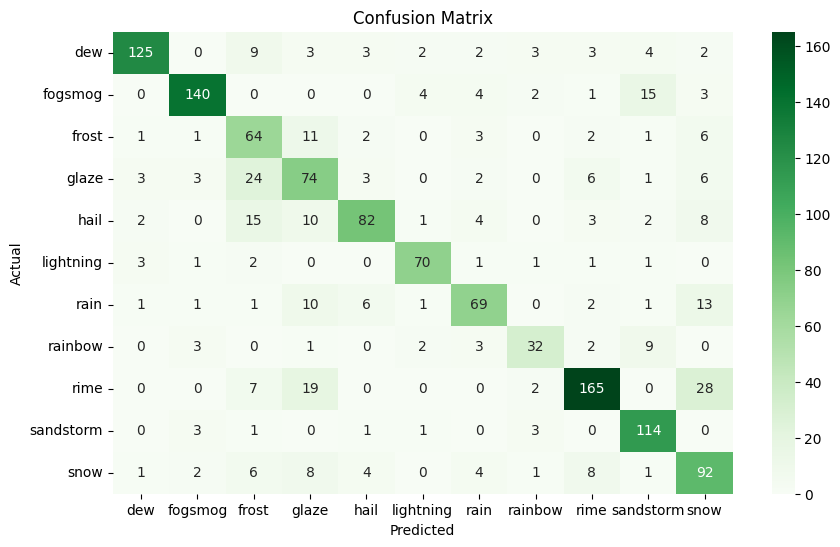

In [18]:

# Make the prediction
predictions_nn_probs = cnn_model.predict(test_images)

# Assign each image to the class with the highest probability
predictions_nn = np.argmax(predictions_nn_probs, axis=1)

# Calculate the confusion matrix
cm = sklearn.metrics.confusion_matrix(np.argmax(test_labels, axis=1), predictions_nn)

# Get class names from label dictionary
class_names = list(label_dict.keys())

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Add row and column names for clarity
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'

# Add row and column for totals
cm_df['All'] = cm_df.sum(axis=1)
cm_df.loc['All'] = cm_df.sum(axis=0)

# Print the confusion matrix
print("The confusion matrix of the classification is:")
print(cm_df)
print("-" * 100)

# Plot the confusion matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm_df.iloc[:-1, :-1], annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Ο παραπάνω πίνακας σύγχυσης μας δείχνει τα αποτελέσματα ταξινόμησης πολλαπλών κλάσεων ( συγκεκριμένα 11 κατηγορίες καιρού  ) :
dew, fog/smog, frost, glaze, hail, lightning , rain, rainbow, rime, sandstorm and snow.

- Οι σειρές αντιστοιχούν στις πραγματικές ετικέτες.
- Οι στήλες αντιστοιχούν στις προβλεπόμενες τιμές ετικετών.
- Οι τιμές μέσα στον πίνακα δείχνουν τον αριθμό των δειγμάτων.

1. Προβλεπόμενες :
    -Οι προβλεπόμενες κατηγορίες αναφέρονται ως : dew, fog/smog, frost, glaze, hail, lightning , rain, rainbow, rime, sandstorm and snow . 
2. Πραγματικές :
    -Οι πραγματικές 11 κατηγορίες αναφέρονται ως δείκτες: dew, fog/smog, frost, glaze, hail, lightning , rain, rainbow, rime, sandstorm and snow
    -Αυτές οι κατηγορίες αντιπροσωπεύουν τους πραγματικούς τύπους καιρού που υπάρχουν στον dataset.
3. Τιμές :
    -Οι τιμές δείχνουν των αριθμό των δειγμάτων που προβλεπόνταν να ανήκουν σε μια συγκεκριμένη κλάση (στήλη) και στην πραγματικότητα ανήκουν σε μια ορισμένη κατηγορία.

Τα δείγματα που ταξινομήθηκαν σωστά καθώς και τα διαγώνια στοιχεία του πίνακα ( που δείχνουν τις σωστά ταξινομημένες τιμές ) έχουν **ΑΥΞΗΜΕΝΕΣ ΤΙΜΕΣ**
Κάποιες **ΛΑΘΟΣ ΤΙΜΕΣ** εκτός των διαγώνιων σημείων υπάρχουν άλλα ειναι ελάχιστες. Για πραάδειγμα υπήρχαν 13 δειγματα glaze εικόνων  που ταξινομήθηκαν λάθος ως snow εικόνες.